In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,RegexpTokenizer
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,roc_curve,precision_score,recall_score,f1_score,roc_auc_score
import matplotlib.pyplot as plt

In [24]:
amazon_df = pd.read_csv('Amazon_Reviews.csv') 
amazon_df

,Review,Label
0,Stuning even for the non-gamer: This sound tr...,1
1,The best soundtrack ever to anything.: I'm re...,1
2,Amazing!: This soundtrack is my favorite musi...,1
3,Excellent Soundtrack: I truly like this sound...,1
4,"Remember, Pull Your Jaw Off The Floor After H...",1
...,...,...
194,A Book That Is Worth a Second Look: This book...,1
195,Best game ever: This games makes even amazing...,1
196,Guitar in Absentia: With all due respect to a...,0
197,Stiff and Smells like drying paint: You get w...,0


In [25]:
y = amazon_df['Label']
amazon_df.drop(columns='Label',inplace=True)

In [28]:
amazon_df['Review'][1]

" The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny."

In [20]:
X_train,X_test,y_train,y_test = train_test_split(amazon_df,y,test_size=0.2,random_state =32)

In [21]:
tokenizer = RegexpTokenizer(r'\w+') #Matches any alphanumeric character
lemmatizer = WordNetLemmatizer()

In [22]:
#function to preprocess/clean data
def clean_data(review):
    tokens = tokenizer.tokenize(review) #generates tokens
    pure_tokens = [token.lower() for token in tokens if token.lower() not in stopwords.words('english')] #stopwords removal
    lemmatized_tokens = [lemmatizer.lemmatize(token,pos='v') for token in pure_tokens]
    return ' '.join(lemmatized_tokens)
    

In [16]:
clean_data(X_train['Review'][0])

'stun even non gamer sound track beautiful paint senery mind well would recomend even people hate video game music play game chrono cross game ever play best music back away crude keyboarding take fresher step grate guitars soulful orchestras would impress anyone care listen _'

In [17]:
'It' in stopwords.words('english') # matches lowercase

False

In [8]:
X_train['cleaned_text'] = X_train['Review'].apply(clean_data)
X_test['cleaned_text'] = X_test['Review'].apply(clean_data)

In [9]:
X_train['cleaned_text']

156    never get go book never really seem get go muc...
154    beware buy camera christmas open first could f...
153    sony basic hi8 handycam rock performance outst...
196    guitar absentia due respect ambient music enth...
184    ok watch watch last night remember enough give...
                             ...                        
190    unmask sadly absolutely nothing original movie...
124    oh cereal sweet yet good one taste addiction t...
54     best buy lonely planet use lonely planet book ...
133    good manual expect book full glossy sharp pict...
43     old good book worth keep collection advise sou...
Name: cleaned_text, Length: 159, dtype: object

In [10]:
tfidf = TfidfVectorizer()

In [11]:
X_train_tfidf=tfidf.fit_transform(X_train['cleaned_text'])
X_test_tfidf=tfidf.transform(X_test['cleaned_text'])

In [12]:
X_train_tfidf

<159x2395 sparse matrix of type '<class 'numpy.float64'>'
	with 5491 stored elements in Compressed Sparse Row format>

In [13]:
X_train_tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.20807037, 0.        , ..., 0.        , 0.        ,
        0.        ]])

# #LogisticRegression

In [51]:
logreg = LogisticRegression()
logreg.fit(X_train_tfidf,y_train)
print('train score =',logreg.score(X_train_tfidf,y_train))
print('test score =',logreg.score(X_test_tfidf,y_test))

train score = 1.0
test score = 0.7


In [52]:
test_predictions = logreg.predict(X_test_tfidf)
test_predictions

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [53]:
confusion_matrix(y_test,test_predictions)

array([[ 8,  9],
       [ 3, 20]], dtype=int64)

In [54]:
comparision_df = pd.DataFrame({'Actuals':y_test,'predictions':test_predictions})
comparision_df

,Actuals,predictions
122,1,1
185,1,0
167,1,1
101,1,1
29,1,0
75,0,1
144,0,0
28,0,1
121,0,1
181,0,1


In [56]:
probability = logreg.predict_proba(X_test_tfidf) 
pos_probability = logreg.predict_proba(X_test_tfidf)[::,1]
pos_probability 

array([0.51344657, 0.48512446, 0.54980498, 0.60753757, 0.48843135,
       0.53306863, 0.48158553, 0.51401692, 0.66707742, 0.57097396,
       0.44538558, 0.48890139, 0.58957852, 0.56461531, 0.56836731,
       0.66191081, 0.58453669, 0.46935312, 0.58493598, 0.45963028,
       0.43360383, 0.45992349, 0.56247314, 0.59016211, 0.54023861,
       0.623708  , 0.6108713 , 0.52755651, 0.56861733, 0.63196908,
       0.7892953 , 0.5418268 , 0.57317307, 0.55266178, 0.59975182,
       0.59962525, 0.53225961, 0.41744053, 0.56642502, 0.49176739])

In [57]:
fpr,tpr,thresholds = roc_curve(y_test,pos_probability )

Text(0, 0.5, 'True Positive rate')

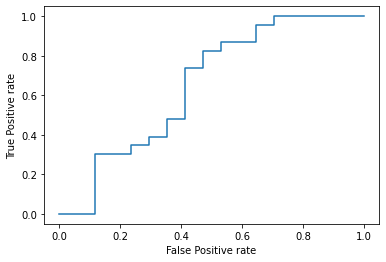

In [59]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')

In [60]:
#test scores
print('precision score',precision_score(y_test,test_predictions))
print('recall score',recall_score(y_test,test_predictions))
print('test f1_score :',f1_score(y_test,test_predictions))

precision score 0.6896551724137931
recall score 0.8695652173913043
test f1_score : 0.7692307692307693


In [61]:
roc_auc_score(y_test,test_predictions)

0.670076726342711

# Naive Bayes classifier-Multinomial

In [49]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [62]:
print('train score =',mnb.score(X_train_tfidf,y_train))
print('test score =',mnb.score(X_test_tfidf,y_test))

train score = 0.9811320754716981
test score = 0.725


In [63]:
test_predictions_nb = mnb.predict(X_test_tfidf)
test_predictions_nb

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [64]:
confusion_matrix(y_test,test_predictions_nb)

array([[ 8,  9],
       [ 2, 21]], dtype=int64)

In [65]:
comparision_nb_df = pd.DataFrame({'Actuals':y_test,'predictions':test_predictions_nb})
comparision_nb_df

,Actuals,predictions
122,1,1
185,1,0
167,1,1
101,1,1
29,1,1
75,0,1
144,0,0
28,0,1
121,0,1
181,0,1


In [66]:
probability_nb = mnb.predict_proba(X_test_tfidf) 
pos_probability_nb = mnb.predict_proba(X_test_tfidf)[::,1]
pos_probability_nb

array([0.55449506, 0.4576658 , 0.5920797 , 0.64692929, 0.51463811,
       0.59700313, 0.43509621, 0.51531746, 0.78315093, 0.63602253,
       0.39305543, 0.47280137, 0.68699797, 0.601002  , 0.66116822,
       0.77946374, 0.64544489, 0.44652841, 0.63799921, 0.44739824,
       0.37887793, 0.4542616 , 0.61758751, 0.66612175, 0.58149807,
       0.69074634, 0.70279603, 0.53624489, 0.61871986, 0.75257451,
       0.88379299, 0.5888999 , 0.61829762, 0.61179677, 0.6804014 ,
       0.65259363, 0.59432709, 0.36116102, 0.60761717, 0.49271789])

In [67]:
fpr1,tpr1,thresholds1 = roc_curve(y_test,pos_probability_nb)

Text(0, 0.5, 'True Positive rate')

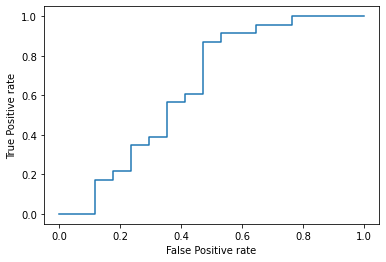

In [69]:
plt.plot(fpr1,tpr1)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')

In [70]:
#test scores
print('precision score',precision_score(y_test,test_predictions_nb))
print('recall score',recall_score(y_test,test_predictions_nb))
print('test f1_score :',f1_score(y_test,test_predictions_nb))

precision score 0.7
recall score 0.9130434782608695
test f1_score : 0.7924528301886793


In [71]:
roc_auc_score(y_test,test_predictions_nb)

0.6918158567774937